# 2)

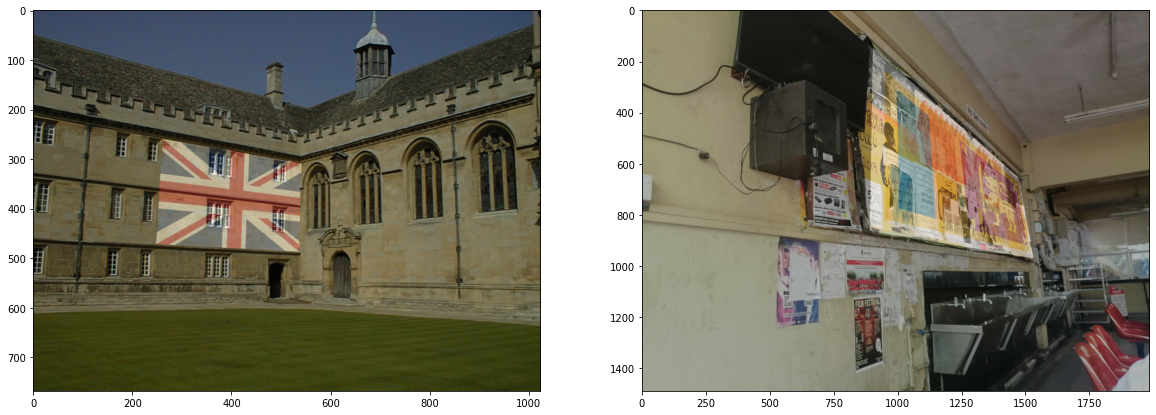

'\nhttps://www.etutorialspoint.com/index.php/319-python-opencv-overlaying-or-blending-two-images\nhttps://learnopencv.com/homography-examples-using-opencv-python-c/\nhttps://theailearner.com/tag/cv2-warpperspective/\nhttps://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f\n\n'

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


#load images 
flag = cv.cvtColor(cv.imread(r'Images\Flag_of_the_United_Kingdom.png'), cv.COLOR_BGR2RGB)
wall = cv.cvtColor(cv.imread(r'Images\002.jpg'), cv.COLOR_BGR2RGB)

flag2 = cv.cvtColor(cv.imread(r'Images\sl_flag.png'), cv.COLOR_BGR2RGB)
wall2 = cv.cvtColor(cv.imread(r'Images\Wall 2.jpeg'), cv.COLOR_BGR2RGB)

# interesting points
flag_pts = np.array([[0,0],[383,0],[383,192],[0,192]])
wall_pts = np.array([[261,260],[541,308],[536,487],[248,472]])

flag2_pts = np.array([[0,0],[860,0],[860,470],[0,470]])
wall2_pts = np.array([[902,148],[1472,656],[1530,970],[890,863]])


def get_projection(wall,flag,wall_pts,flag_pts):
    # getting homofraphy
    h, status = cv.findHomography(flag_pts, wall_pts)

    # get transformed image
    transformed_img =  cv.warpPerspective(flag, h,(wall.shape[1],wall.shape[0]))

    #blending images
    blended =cv.addWeighted(wall, 0.7, transformed_img,0.3,0)

    return blended

#show
fig, ax = plt.subplots(1,2,figsize = (20,20))
ax[0].imshow(get_projection(wall,flag,wall_pts,flag_pts))
ax[1].imshow(get_projection(wall2,flag2,wall2_pts,flag2_pts)) 
plt.show()

#reference
"""
https://www.etutorialspoint.com/index.php/319-python-opencv-overlaying-or-blending-two-images
https://learnopencv.com/homography-examples-using-opencv-python-c/
https://theailearner.com/tag/cv2-warpperspective/
https://towardsdatascience.com/image-processing-with-python-applying-homography-for-image-warping-84cd87d2108f

"""



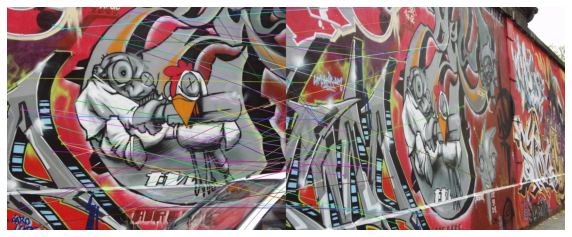

<KeyPoint 00000288C283B660> <KeyPoint 00000288C12C1AA0>
<KeyPoint 00000288C1295CB0> <KeyPoint 00000288C12953B0>
[2.4854354858398438, 320.57965087890625]


'Reference\n\nhttps://towardsdatascience.com/understanding-homography-a-k-a-perspective-transformation-cacaed5ca17'

In [14]:
img1 = cv.cvtColor(cv.imread(r'graf\img1.ppm'), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(r'graf\img5.ppm'), cv.COLOR_BGR2RGB)

#geting key points
sift = cv.SIFT_create()
keypoints_1,  desctriptor_1 = sift.detectAndCompute(img1, None)
keypoints_2,  desctriptor_2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck = True)

matches = bf.match(desctriptor_1,desctriptor_2)
matches = sorted(matches, key = lambda x:x.distance)

fig, ax = plt.subplots(figsize =(10,10))
ax.axis('off')
img_matches = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img_matches)
plt.show()

print(keypoints_1[0],keypoints_1[1])
print(keypoints_2[0],keypoints_2[1])
print(list(keypoints_1[0].pt))

"""Reference

https://towardsdatascience.com/understanding-homography-a-k-a-perspective-transformation-cacaed5ca17"""



Each keypoint has 128 descriptors. 16 x 16 neighbourhood is selected around a keypoint depending on the scale. It is devided into 16, 4 by 4 sub blockes. From each sub block, 8 bin orientation histogram is created for each block.  
So there are 128 diferent values for a one keypoint as the descriptor.

In [26]:
img1 = cv.cvtColor(cv.imread(r'graf\img1.ppm'), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(cv.imread(r'graf\img5.ppm'), cv.COLOR_BGR2RGB)

#geting key points
sift = cv.SIFT_create()
keypoints_1, desctriptor_1 = sift.detectAndCompute(img1, None)
keypoints_2, desctriptor_2 = sift.detectAndCompute(img2, None)

bf = cv.BFMatcher(cv.NORM_L1, crossCheck = True)

matches = bf.match(desctriptor_1,desctriptor_2)
matches = sorted(matches, key = lambda x:x.distance)

# Initialize lists
list_kp1 = []
list_kp2 = []

# For each match...
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = keypoints_1[img1_idx].pt
    (x2, y2) = keypoints_2[img2_idx].pt

    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

print(list_kp1[0][0])
print(list_kp2[0])

"""print(type(desctriptor_1[0]))
print(len(keypoints_1))
print(len(desctriptor_1[0]))
print(desctriptor_1[0]) """

180.38479614257812
(71.36940002441406, 568.5939331054688)


'print(type(desctriptor_1[0]))\nprint(len(keypoints_1))\nprint(len(desctriptor_1[0]))\nprint(desctriptor_1[0]) '

In [ ]:
def get_homography_matrix(source, destination):
    assert len(source) == len(destination) # source points and destination points must be equal

    A =[]
    B =[]
    for i in range(len(source)):
        x_s , y_s = source[i]
        x_d , y_d = destination[i]
        A.append([x_s, y_s,1,0,0,0, (-x_d)*(x_s), (-x_d)*(y_s)])
        A.append([0,0,0, x_s,y_s,1 ,(-y_d)*(x_s), (-y_d)*(y_s)])
        B+= [x_d, y_d]

    A=np.array(A)
    h= np.linalg.lstsq(A,B)[0]  # least square solution
    h= np.concatenate((h,[1]), axis = -1)
    return np.reshape(h,(3,3))

#def ransac_()

def get_matching_points(img1, img2, match_percentage):

    #geting key points
    sift = cv.SIFT_create()
    keypoints_1, desctriptor_1 = sift.detectAndCompute(img1, None)
    keypoints_2, desctriptor_2 = sift.detectAndCompute(img2, None)
    #matching
    bf = cv.BFMatcher()
    matches = bf.knnMatch(desctriptor_1,desctriptor_2, k=2)
    
    #get best matches
    best_matches =[]

    """referance
    https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html"""

    for m,n in matches:
        if m.distance < match_percentage*n.distance:
            best_matches.append([m])
    #get matching keypoints
    """https://stackoverflow.com/questions/30716610/how-to-get-pixel-coordinates-from-feature-matching-in-opencv-python"""
    pset_1= np.zeros((len(best_matches),2), dtype = np.float32)
    pset_2= np.zeros((len(best_matches),2), dtype = np.float32)

    for i, match in enumerate(best_matches):
        pset_1[i,:] = keypoints_1[match.queryIdx].pt
        pset_2[i,:] = keypoints_1[match.trainIdx].pt
    
    return np.concatenate((pset_1,pset_2),axis =1) # first 2 columns are the x, y of image 1, second 2 columns are the matching x,y of image 2


"""def get_points(keypoints_1,keypoints_2):
    list_1 , list_2 = [], []
    ln = len(keypoints_1)
    for i in range(ln):
        list_1.append(list(keypoints_1[i].pt))
        list_2.append(list(keypoints_2[i].pt))
    return [list_1,list_2]"""





In [27]:
l=np.array([[1],[2]])
a=np.array([[3],[4]])
print(np.concatenate((l,a),axis =1))

[[1 3]
 [2 4]]
